In [118]:
import pandas as pd
import requests
import folium
import numpy as np
import matplotlib.pyplot as plt

from datetime import datetime
from folium.plugins import HeatMap

In [52]:
cwb_url = 'http://opendata.cwb.gov.tw/api/v1/rest/datastore/'
data_id = 'O-A0002-001'
#氣象局 OPEN DATA 授權碼
auth_key = 'CWB-41CB46E9-F4E3-475F-8B71-EEAF1DCDFDB5'

In [53]:
def getData(data_id, auth_key, params={}): #params 預留日後參數需求
    #print(params)
    dest_url = cwb_url + '{}'.format(data_id)
    r = requests.get(dest_url, headers={'Authorization': auth_key})
    #params_list = ['{}={}'.format(key, params[key]) for key in params]
    #print(params_list)
    #params_str = '?' + '&'.join(params_list)
    #dest_url += params_str
    #logging.debug('dest_url: {}'.format(dest_url))

    if r.status_code != 200:
        #logging.error('r.status_code: {}'.format(r.status_code))
        print('r.status_code: {}'.format(r.status.code))
        return None

    data = r.json()

    if data.get('success') != 'true':
        return None
    return data

In [23]:
json_data

{'success': 'true',
 'result': {'resource_id': 'O-A0002-001',
  'fields': [{'id': 'lat', 'type': 'Double'},
   {'id': 'lon', 'type': 'Double'},
   {'id': 'locationName', 'type': 'String'},
   {'id': 'stationId', 'type': 'String'},
   {'id': 'obsTime', 'type': 'Timestamp'},
   {'id': 'elementName', 'type': 'String'},
   {'id': 'elementValue', 'type': 'String'},
   {'id': 'parameterName', 'type': 'String'},
   {'id': 'parameterValue', 'type': 'String'}]},
 'records': {'location': [{'lat': '24.7783',
    'lon': '121.4946',
    'locationName': '福山',
    'stationId': 'C0A560',
    'time': {'obsTime': '2020-03-16 21:20:00'},
    'weatherElement': [{'elementName': 'ELEV', 'elementValue': '405.00'},
     {'elementName': 'RAIN', 'elementValue': '-998.00'},
     {'elementName': 'MIN_10', 'elementValue': '-998.00'},
     {'elementName': 'HOUR_3', 'elementValue': '-998.00'},
     {'elementName': 'HOUR_6', 'elementValue': '-998.00'},
     {'elementName': 'HOUR_12', 'elementValue': '0.00'},
     {'e

In [54]:
def parse_json_to_dataframe(data):
    columns = ['stationId','locationName','lat','lon', 'obstime','ELEV','RAIN','MIN_10','HOUR_3','HOUR_6','HOUR_12','HOUR_24','NOW']
    df = pd.DataFrame(columns=columns)
    dataDic = {}
    locations = data['records']['location']
    row = -1
    for l in locations:
        row = row + 1
        dataDic['stationId'] = l['stationId']
        dataDic['locationName'] = l['locationName']
        dataDic['obstime'] = l['time']['obsTime']
        dataDic['lat'] = l['lat']
        dataDic['lon'] = l['lon']
        factors = l['weatherElement']
        for f in factors:
            factor_name = f['elementName']
            dataDic[factor_name] = f['elementValue']
        for key in dataDic.keys():
            df.loc[row,key] = dataDic[key] #每一個row的column賦予該欄位的值 #dataDic[key]是每一個欄位的值 key是stationId locationName obstime lat lon這個順序的欄位

    return df 

In [55]:
if __name__ == '__main__':
    json_data = getData(data_id, auth_key, {})
    df = parse_json_to_dataframe(json_data)
    df['InsertDatetime']=datetime.now()

In [89]:
df.head()

,stationId,locationName,lat,lon,obstime,ELEV,RAIN,MIN_10,HOUR_3,HOUR_6,HOUR_12,HOUR_24,NOW,latest_2days,latest_3days,InsertDatetime,False
0,C0A560,福山,24.7783,121.4946,2020-03-16 22:00:00,405.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,7.5,2020-03-16 22:13:04.958142,0
1,C0X190,安平,22.9950,120.1441,2020-03-16 22:00:00,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,10.5,2020-03-16 22:13:04.958142,0
2,C1F9E1,龍安,24.1619,120.8239,2020-03-16 22:00:00,563.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,17.5,2020-03-16 22:13:04.958142,0
3,467480,嘉義,23.4977,120.4248,2020-03-16 22:00:00,26.9,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,21.5,2020-03-16 22:13:04.958142,0
4,C0M730,嘉義市東區,23.4594,120.4524,2020-03-16 22:00:00,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,18.5,2020-03-16 22:13:04.958142,0


# 資料型態都是object

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 965 entries, 0 to 964
Data columns (total 17 columns):
stationId         965 non-null object
locationName      965 non-null object
lat               965 non-null float64
lon               965 non-null float64
obstime           965 non-null datetime64[ns]
ELEV              965 non-null float64
RAIN              965 non-null float64
MIN_10            965 non-null float64
HOUR_3            965 non-null float64
HOUR_6            965 non-null float64
HOUR_12           965 non-null float64
HOUR_24           965 non-null float64
NOW               965 non-null object
latest_2days      965 non-null float64
latest_3days      965 non-null float64
InsertDatetime    965 non-null datetime64[ns]
False             965 non-null int64
dtypes: datetime64[ns](2), float64(11), int64(1), object(3)
memory usage: 175.7+ KB


# 把object轉成float 時間轉datatime

In [58]:
df['lat'] = df['lat'].astype('float')
df['lon'] = df['lon'].astype('float')
df['ELEV'] = df['ELEV'].astype('float')
df['RAIN'] = df['RAIN'].astype('float')
df['MIN_10'] = df['MIN_10'].astype('float')
df['HOUR_3'] = df['HOUR_3'].astype('float')
df['HOUR_6'] = df['HOUR_6'].astype('float')
df['HOUR_12'] = df['HOUR_12'].astype('float')
df['HOUR_24'] = df['HOUR_24'].astype('float')
df['latest_2days'] = df['latest_2days'].astype('float')
df['latest_3days'] = df['latest_3days'].astype('float')
df['obstime'] = pd.to_datetime(df['obstime'])

# 把小於零的負值替換成0

In [91]:
df[['RAIN','MIN_10','HOUR_3','HOUR_6']] [df["RAIN"] < 0]

,RAIN,MIN_10,HOUR_3,HOUR_6


In [92]:
df['RAIN'] = np.where(df['RAIN'] < 0, 0, df['RAIN'])
df['MIN_10'] = np.where(df['MIN_10'] < 0, 0, df['MIN_10'])
df['HOUR_3'] = np.where(df['HOUR_3'] < 0, 0, df['HOUR_3'])
df['HOUR_6'] = np.where(df['HOUR_6'] < 0, 0, df['HOUR_6'])

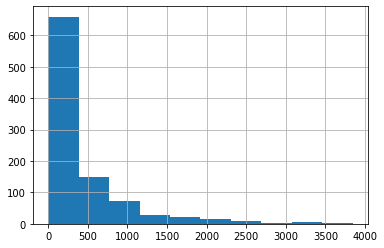

In [96]:
df.ELEV.hist()

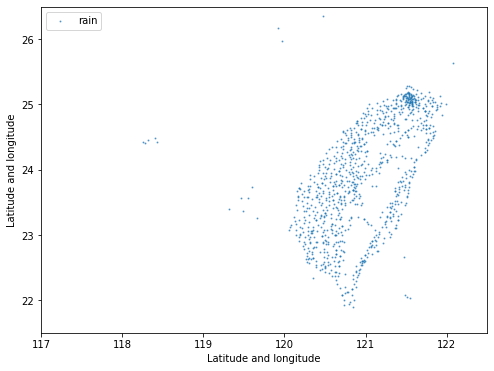

In [115]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111) #總共1 x 1的區域 然後只有一個圖

ax.scatter(df.lon, df.lat, alpha = 0.6, s = 1, label = "rain") #alpha透明度
ax.set_xlim(117,122.5)
ax.set_ylim(21.5,26.5)

plt.xlabel("Latitude and longitude")
plt.ylabel("Latitude and longitude")
plt.legend(loc='upper left')
plt.show()

In [120]:
#zoom_start是比例尺 location[經度,緯度],height="50%", width="50%" 縮放整張圖的大一小
mapa = folium.Map(location=(110, 21), zoom_start=1.5, tiles="Stamen Toner", height="80%", width="80%")
loc_li = list(zip(df.lat, df.lon))[:10000] # <--- change data size
HeatMap(loc_li, radius=15).add_to(mapa) # <-----------------------change radius
mapa